In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [71]:
df = pd.read_excel (r'C:\Users\naray\Downloads\EastWestAirlines.xlsx', sheet_name='data')
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [73]:
df.shape

(3999, 12)

In [74]:
df.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [75]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

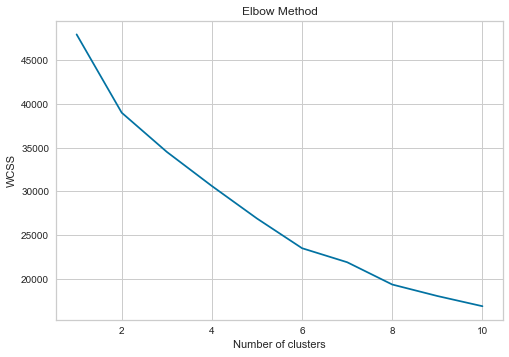

In [76]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, random_state = 0)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [77]:
df= df.rename(columns={'ID#':'ID', 'Award?':'Award'})

In [78]:
df

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [79]:
df1 =  df.drop(['ID','Award'], axis=1)
df1.head(2)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,28143,0,1,1,1,174,1,0,0,7000
1,19244,0,1,1,1,215,2,0,0,6968


In [80]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()

minmax_df = minmax.fit_transform(df1)
minmax_df.shape

(3999, 10)

In [81]:
from sklearn.decomposition import PCA
pca_std = PCA(random_state=10, n_components=0.95)
pca_std_df= pca_std.fit_transform(df1)

In [82]:
print(pca_std.singular_values_)

[6403347.22235874]


In [83]:
print(pca_std.explained_variance_ratio_*100)

[95.44022019]


In [84]:
cum_variance = np.cumsum(pca_std.explained_variance_ratio_*100)
cum_variance

array([95.44022019])

In [85]:
from sklearn.decomposition import PCA

pca_minmax =  PCA(random_state=10, n_components=0.95)
pca_minmax_df = pca_minmax.fit_transform(minmax_df)

In [86]:
print(pca_minmax.singular_values_)

[23.30644253 14.98078096  6.73641543  4.71018421  4.35528647]


In [87]:
print(pca_minmax.explained_variance_ratio_*100)

[60.47067269 24.98398618  5.05185116  2.46983879  2.11167109]


In [88]:
model1 = KMeans(n_clusters=6, random_state=0)
y_predict1 = model1.fit_predict(pca_std_df)
y_predict1.shape

(3999,)

In [89]:
y_predict1

array([0, 0, 0, ..., 4, 4, 0])

In [90]:
model1.labels_

array([0, 0, 0, ..., 4, 4, 0])

In [91]:
model1.cluster_centers_

array([[ -51337.62627764],
       [ 104139.64755976],
       [ 655990.07606846],
       [ 293102.65669982],
       [   9805.27613385],
       [1211320.05539096]])

In [92]:
model1.inertia_

2750196377962.018

In [93]:
model1.score(pca_std_df) 

-2750196377962.0186

In [94]:
model1.get_params()

{'algorithm': 'lloyd',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 6,
 'n_init': 10,
 'random_state': 0,
 'tol': 0.0001,
 'verbose': 0}

In [95]:
model1_cluster = pd.DataFrame(model1.labels_.copy(), columns=['Kmeans_Clustering'])

In [96]:
Kmeans_df = pd.concat([df.copy(), model1_cluster], axis=1)
Kmeans_df.head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Kmeans_Clustering
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,4


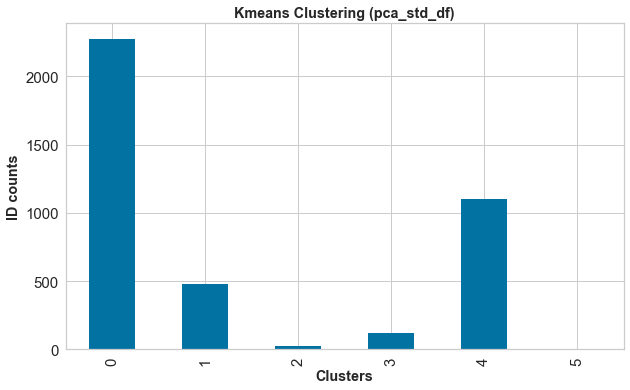

In [97]:
fig, ax = plt.subplots(figsize=(10, 6))
Kmeans_df.groupby(['Kmeans_Clustering']).count()['ID'].plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('Kmeans Clustering (pca_std_df)',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

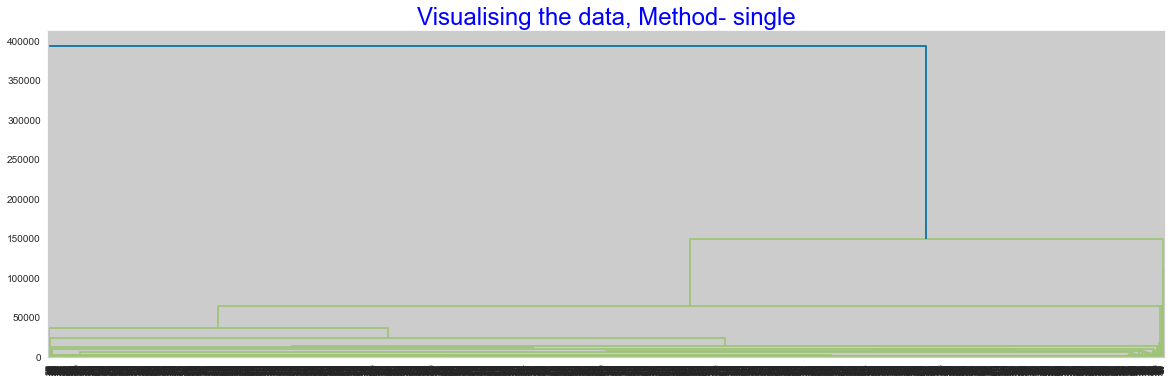

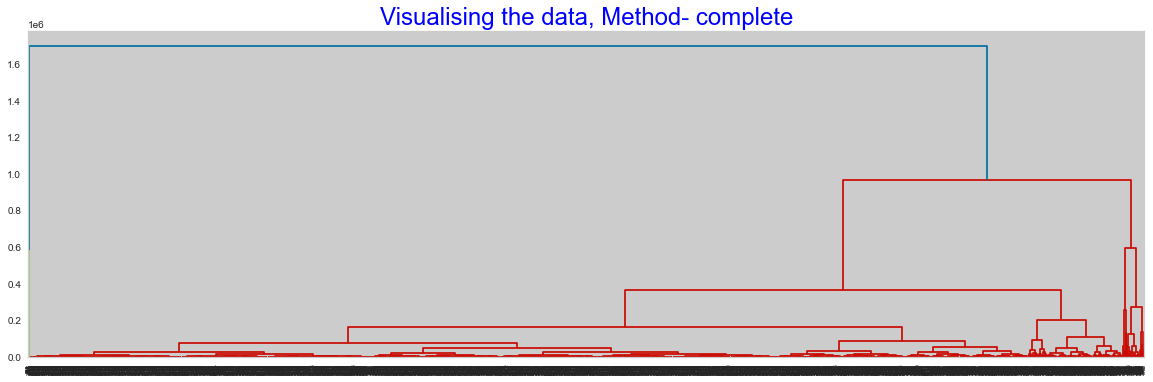

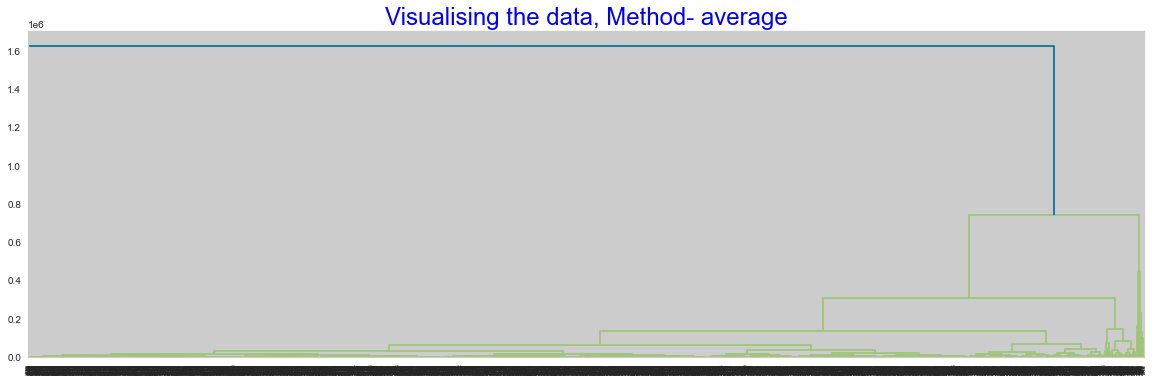

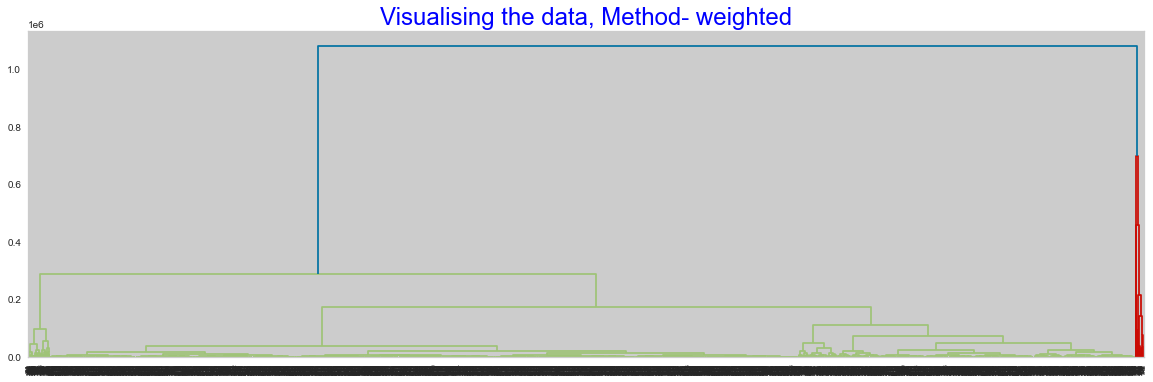

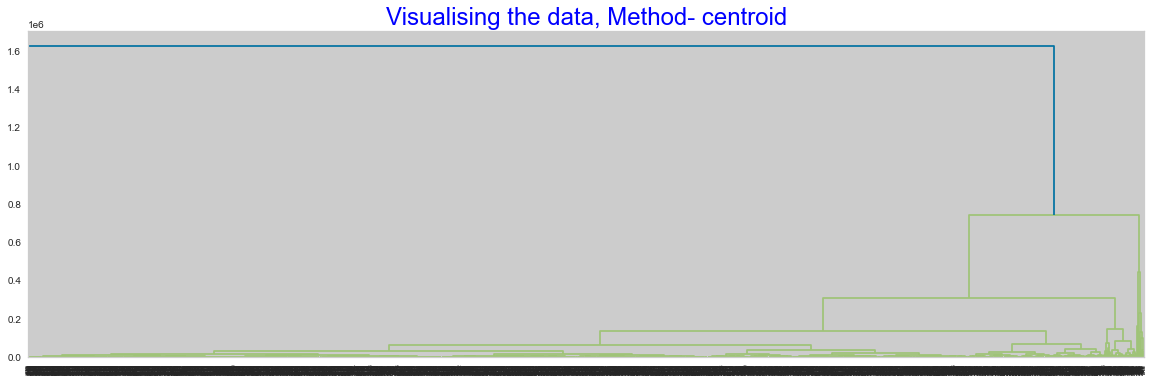

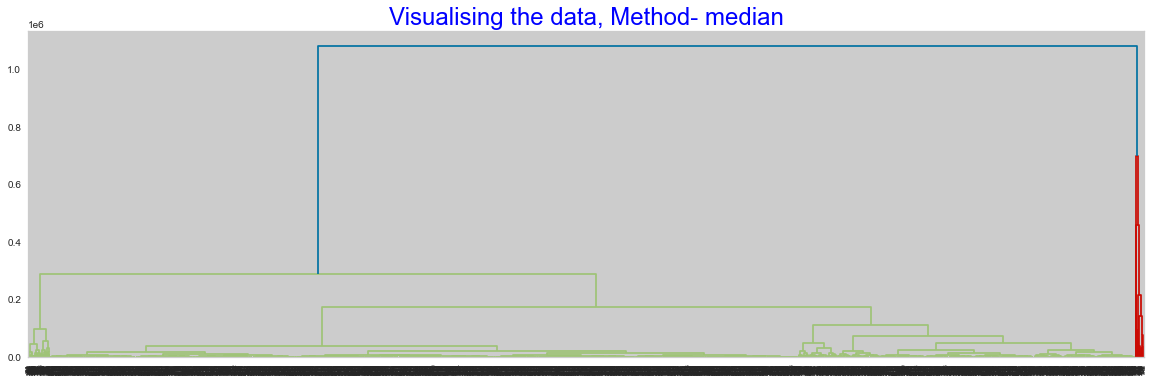

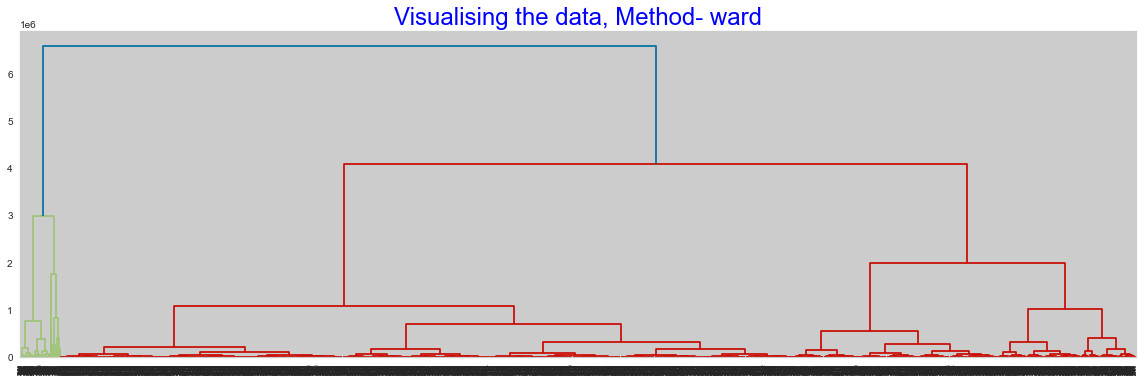

In [98]:
# Applying Dendrogram on PCA data. Or you may apply it on Standardized/normalized indepedent variable data.
# Here diffrent linkage method from hyperparameter is used to see diff between methods for understanding. 
# Ward method is commanly used since it is simpler to visualize understanding.
# Find number of cluster's using color coding of dendrogram. Each color indicates one cluster.

import scipy.cluster.hierarchy as shc
for methods in ['single','complete','average','weighted','centroid','median','ward']: 
   plt.figure(figsize =(20, 6)) 
    
   dict = {'fontsize':24,'fontweight' :16, 'color' : 'blue'}
    
   plt.title('Visualising the data, Method- {}'.format(methods),fontdict = dict) 
   Dendrogram1 = shc.dendrogram(shc.linkage(pca_std_df, method = methods,optimal_ordering=False))
    
# Note: the execution of this cell takes time so i have attached output graphs below

In [99]:
from sklearn.cluster import AgglomerativeClustering
n_clusters = [2,3,4,5,6,7,8]  # always start number from 2.

for n_clusters in n_clusters:
    for linkages in ["ward", "complete", "average", "single"]:
        hie_cluster1 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages) # bydefault it takes linkage 'ward'
        hie_labels1 = hie_cluster1.fit_predict(pca_std_df)
        silhouette_score1 = silhouette_score(pca_std_df, hie_labels1)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_score1)
    print()

For n_clusters = 2 The average silhouette_score with linkage- ward : 0.8203114534982933
For n_clusters = 2 The average silhouette_score with linkage- complete : 0.927951156760826
For n_clusters = 2 The average silhouette_score with linkage- average : 0.9454917283098584
For n_clusters = 2 The average silhouette_score with linkage- single : 0.9454917283098584

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.6352661268458029
For n_clusters = 3 The average silhouette_score with linkage- complete : 0.8317201089624089
For n_clusters = 3 The average silhouette_score with linkage- average : 0.8876146318535075
For n_clusters = 3 The average silhouette_score with linkage- single : 0.9204118139088876

For n_clusters = 4 The average silhouette_score with linkage- ward : 0.6345359624558817
For n_clusters = 4 The average silhouette_score with linkage- complete : 0.8029998885442031
For n_clusters = 4 The average silhouette_score with linkage- average : 0.8744187540935037
For n_

In [100]:
from sklearn.cluster import AgglomerativeClustering
n_clusters = [2,3,4,5,6,7,8]  # always start number from 2.

for n_clusters in n_clusters:
    for linkages in ["ward", "complete", "average", "single"]:
        hie_cluster2 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages) # bydefault it takes linkage 'ward'
        hie_labels2 = hie_cluster2.fit_predict(pca_minmax_df)
        silhouette_score2 = silhouette_score(pca_minmax_df, hie_labels2)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_score2)
    print()

For n_clusters = 2 The average silhouette_score with linkage- ward : 0.45263516644787427
For n_clusters = 2 The average silhouette_score with linkage- complete : 0.5857808960475942
For n_clusters = 2 The average silhouette_score with linkage- average : 0.5003973034034866
For n_clusters = 2 The average silhouette_score with linkage- single : 0.6061073734453648

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.3739125364654644
For n_clusters = 3 The average silhouette_score with linkage- complete : 0.4542833655116024
For n_clusters = 3 The average silhouette_score with linkage- average : 0.4506426101878891
For n_clusters = 3 The average silhouette_score with linkage- single : 0.5029366855064078

For n_clusters = 4 The average silhouette_score with linkage- ward : 0.36547786997315534
For n_clusters = 4 The average silhouette_score with linkage- complete : 0.4561547100712364
For n_clusters = 4 The average silhouette_score with linkage- average : 0.39465688584567493
Fo

In [101]:
agg_clustering = AgglomerativeClustering(n_clusters=5, linkage='average')
y_pred_hie = agg_clustering.fit_predict(pca_std_df)
print(y_pred_hie.shape)
y_pred_hie

(3999,)


array([4, 4, 4, ..., 4, 4, 4], dtype=int64)

In [102]:
agg_clustering.n_clusters_

5

In [103]:
agg_clustering.labels_

array([4, 4, 4, ..., 4, 4, 4], dtype=int64)

In [104]:
agg_clustering.n_leaves_

3999

In [105]:
agg_clustering.n_connected_components_

1

In [106]:
agg_clustering.children_

array([[3370, 3876],
       [ 949, 1621],
       [2254, 2553],
       ...,
       [7991, 7992],
       [7993, 7994],
       [ 275, 7995]])

In [107]:
(silhouette_score(pca_std_df, agg_clustering.labels_)*100).round(3)

77.287

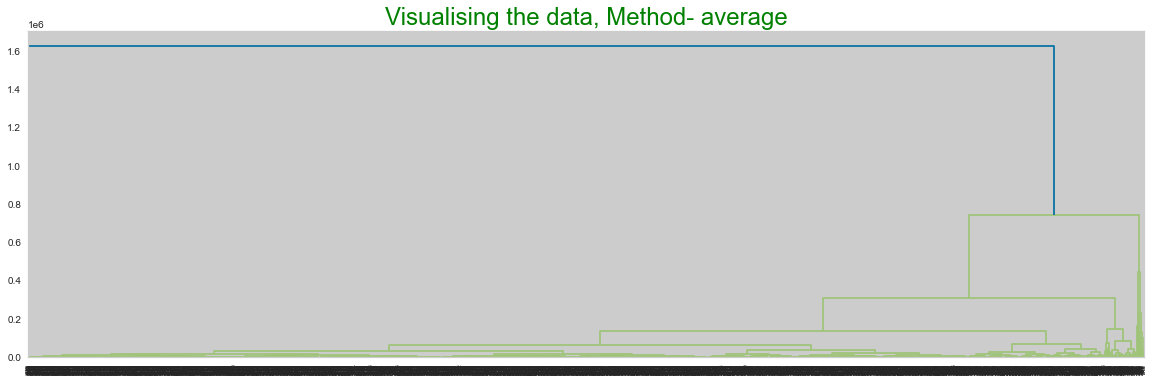

In [108]:
import scipy.cluster.hierarchy as shc
for methods in ['average']: 
    plt.figure(figsize =(20, 6)) 
    
    dict = {'fontsize':24,'fontweight' :16, 'color' : 'green'}
    
    plt.title('Visualising the data, Method- {}'.format(methods),fontdict = dict) 
    Dendrogram2 = shc.dendrogram(shc.linkage(pca_std_df, method = methods,optimal_ordering=False))

In [109]:
hie_cluster = pd.DataFrame(agg_clustering.labels_.copy(), columns=['Hie_Clustering'])

In [110]:
hie_df = pd.concat([df.copy(), hie_cluster], axis=1)
hie_df .head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Hie_Clustering
0,1,28143,0,1,1,1,174,1,0,0,7000,0,4
1,2,19244,0,1,1,1,215,2,0,0,6968,0,4
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,4
3,4,14776,0,1,1,1,500,1,0,0,6952,0,4
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,4


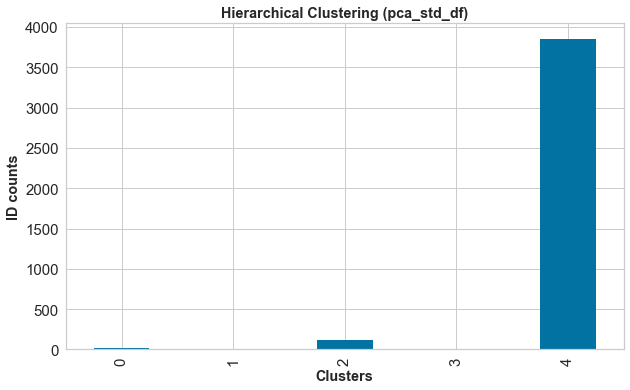

In [113]:
fig, ax = plt.subplots(figsize=(10, 6))
hie_df.groupby(['Hie_Clustering']).count()['ID'].plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('Hierarchical Clustering (pca_std_df)',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

In [114]:
Kmeans_df.groupby(['Kmeans_Clustering']).count()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
Kmeans_Clustering,,,,,,,,,,,,
0,2275,2275,2275,2275,2275,2275,2275,2275,2275,2275,2275,2275
1,479,479,479,479,479,479,479,479,479,479,479,479
2,22,22,22,22,22,22,22,22,22,22,22,22
3,118,118,118,118,118,118,118,118,118,118,118,118
4,1100,1100,1100,1100,1100,1100,1100,1100,1100,1100,1100,1100
5,5,5,5,5,5,5,5,5,5,5,5,5


In [115]:
hie_df.groupby(['Hie_Clustering']).count()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
Hie_Clustering,,,,,,,,,,,,
0,21,21,21,21,21,21,21,21,21,21,21,21
1,4,4,4,4,4,4,4,4,4,4,4,4
2,119,119,119,119,119,119,119,119,119,119,119,119
3,1,1,1,1,1,1,1,1,1,1,1,1
4,3854,3854,3854,3854,3854,3854,3854,3854,3854,3854,3854,3854


In [116]:
count_df = Kmeans_df.groupby(['Kmeans_Clustering']).count()
count_df

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
Kmeans_Clustering,,,,,,,,,,,,
0,2275,2275,2275,2275,2275,2275,2275,2275,2275,2275,2275,2275
1,479,479,479,479,479,479,479,479,479,479,479,479
2,22,22,22,22,22,22,22,22,22,22,22,22
3,118,118,118,118,118,118,118,118,118,118,118,118
4,1100,1100,1100,1100,1100,1100,1100,1100,1100,1100,1100,1100
5,5,5,5,5,5,5,5,5,5,5,5,5


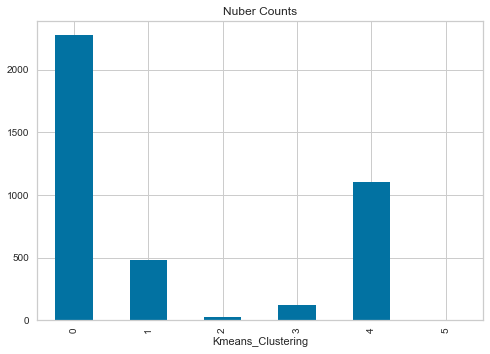

In [117]:
count = count_df.xs('ID' ,axis = 1)
count.plot(kind='bar', title= 'Nuber Counts')
plt.show()

In [118]:
cluster1 = pd.DataFrame(Kmeans_df.loc[Kmeans_df.Kmeans_Clustering==0].mean(),columns= ['Cluster1_avg'])
cluster2 = pd.DataFrame(Kmeans_df.loc[Kmeans_df.Kmeans_Clustering==1].mean(),columns= ['Cluster2_avg'])
cluster3 = pd.DataFrame(Kmeans_df.loc[Kmeans_df.Kmeans_Clustering==2].mean(),columns= ['Cluster3_avg'])
cluster4 = pd.DataFrame(Kmeans_df.loc[Kmeans_df.Kmeans_Clustering==3].mean(),columns= ['Cluster4_avg'])
cluster5 = pd.DataFrame(Kmeans_df.loc[Kmeans_df.Kmeans_Clustering==4].mean(),columns= ['Cluster5_avg'])

In [119]:
avg_df = pd.concat([cluster1,cluster2,cluster3,cluster4,cluster5],axis=1)
avg_df

,Cluster1_avg,Cluster2_avg,Cluster3_avg,Cluster4_avg,Cluster5_avg
ID,2228.955604,1561.638831,944.863636,1160.152542,1889.748182
Balance,23058.619341,176887.062630,728360.045455,364904.415254,83288.387273
Qual_miles,97.161758,268.252610,258.636364,445.288136,146.276364
cc1_miles,1.516044,3.070981,3.500000,3.186441,2.589091
cc2_miles,1.017582,1.008351,1.000000,1.025424,1.010000
cc3_miles,1.004835,1.029228,1.136364,1.000000,1.019091
Bonus_miles,8190.575824,34696.192067,62470.818182,49647.245763,23528.164545
Bonus_trans,8.400879,17.298539,22.000000,20.050847,14.568182
Flight_miles_12mo,234.327912,896.060543,1600.909091,1576.440678,584.037273
Flight_trans_12,0.735385,2.436326,5.727273,4.703390,1.740909


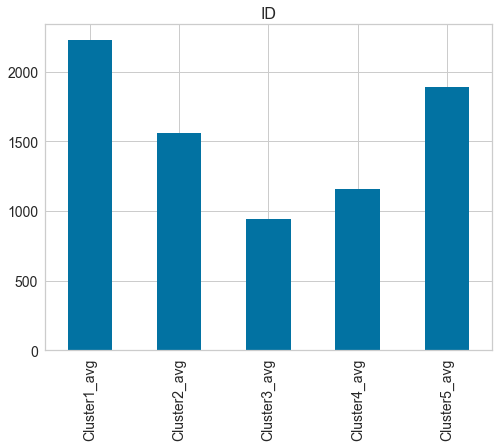

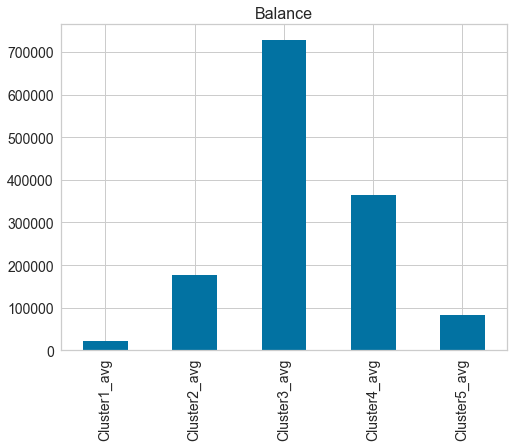

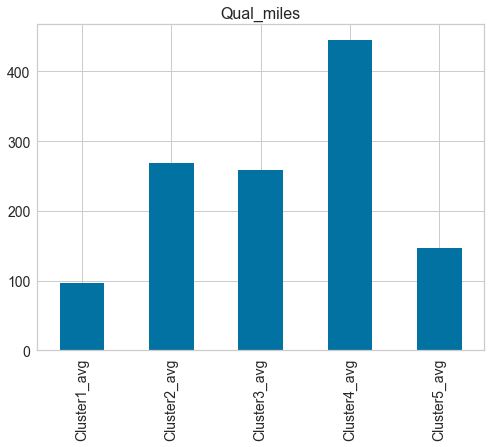

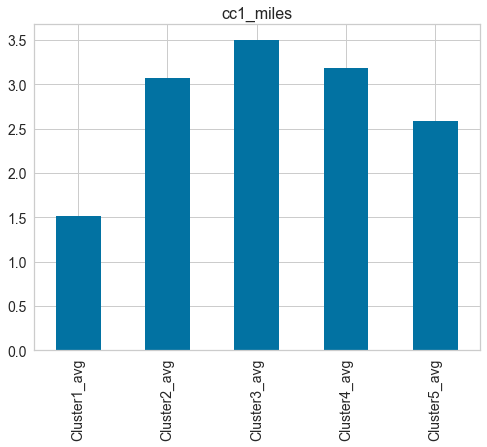

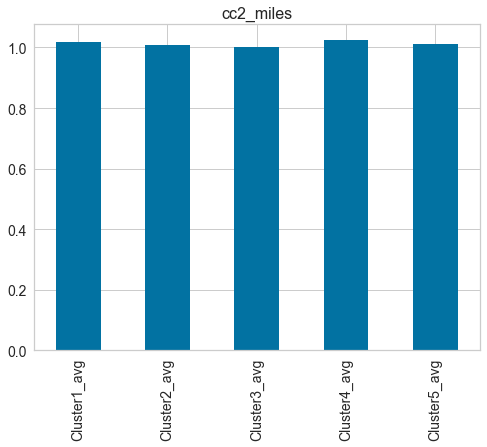

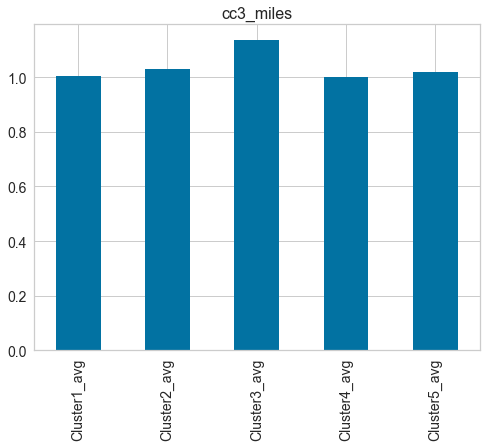

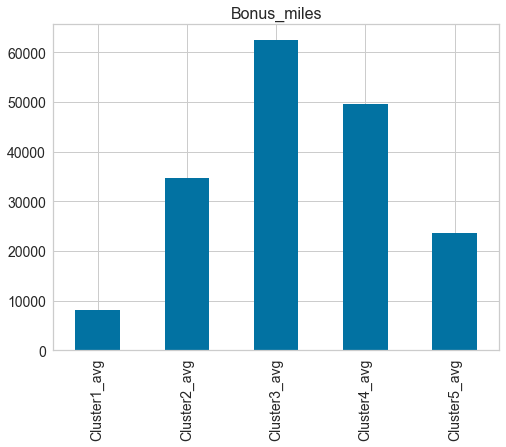

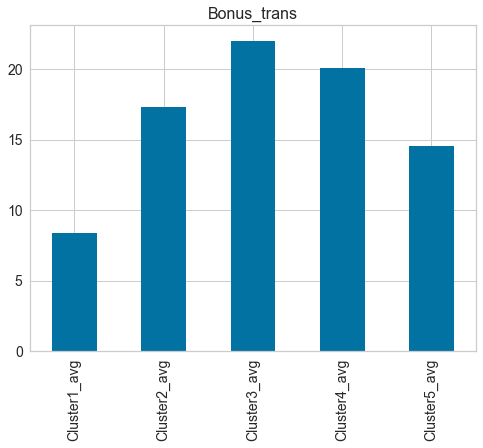

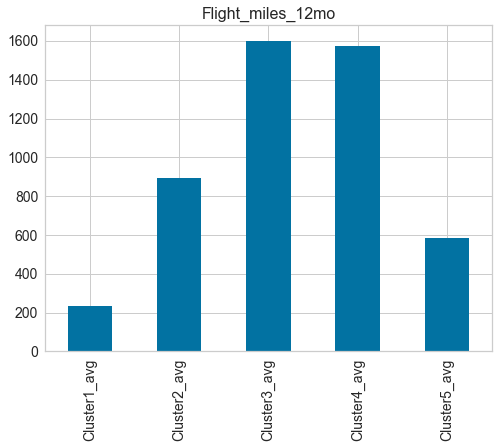

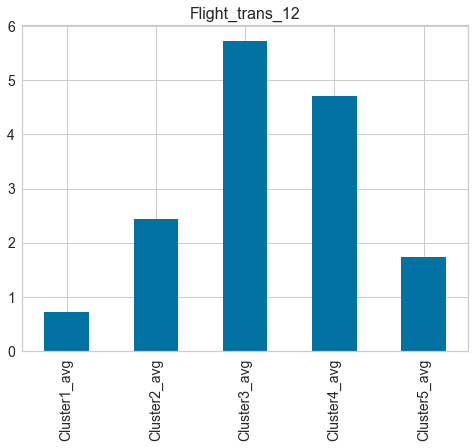

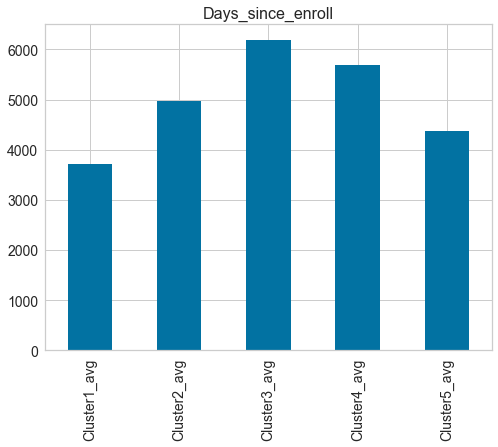

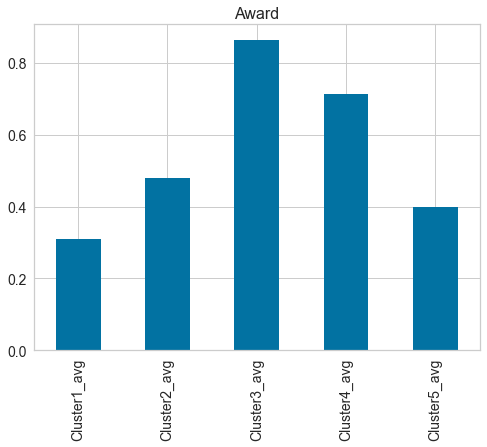

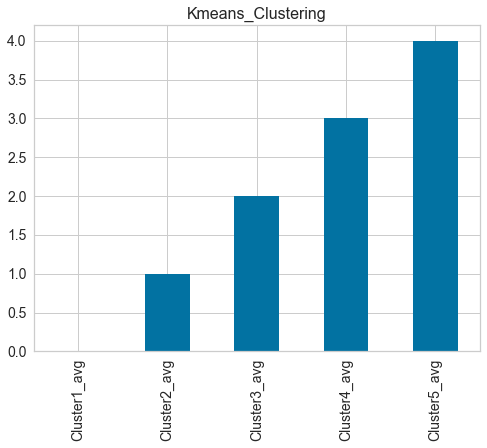

In [120]:
for i , row in avg_df.iterrows():
    fig = plt.subplots(figsize=(8,6))
    j = avg_df.xs(i ,axis = 0)
    plt.title(i, fontsize=16, fontweight=20)
    j.plot(kind='bar',fontsize=14)
    plt.show()
    print()